Hypotheses:
H0: mean A = mean B (no difference)
H1: mean A ≠ mean B (differences exist)

Mean of group A: 80.50 (CI: 78.33 - 82.67)
Mean of group B: 70.90 (CI: 69.04 - 72.76)
t-statistic: 7.6053
p-value: 0.0000006
Reject the null hypothesis — the difference is statistically significant.


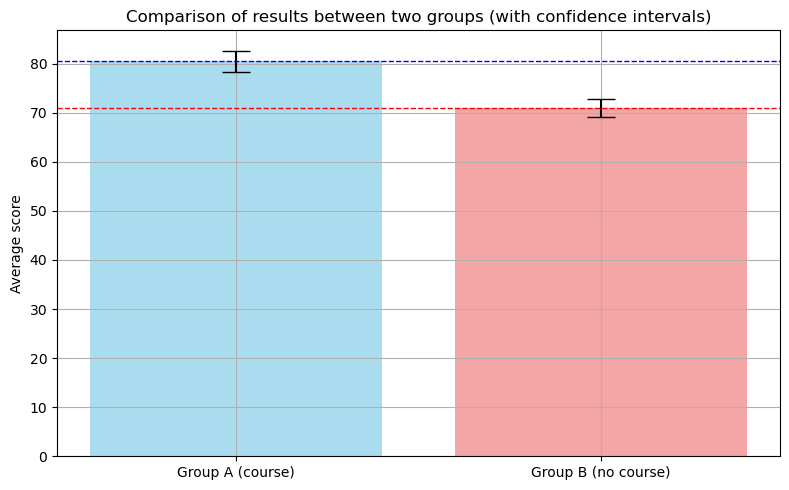

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Data — two independent samples
group_A = np.array([78, 82, 84, 76, 79, 81, 85, 80, 83, 77])
group_B = np.array([72, 70, 68, 74, 69, 71, 73, 75, 70, 67])

# 2. Basic statistics
mean_A = np.mean(group_A)
mean_B = np.mean(group_B)
std_A = np.std(group_A, ddof=1)
std_B = np.std(group_B, ddof=1)
n_A = len(group_A)
n_B = len(group_B)

# 3. t-test for two independent samples
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

# 4. 95% Confidence Intervals
conf_level = 0.95
alpha = 1 - conf_level

sem_A = std_A / np.sqrt(n_A) # standard error mean
sem_B = std_B / np.sqrt(n_B) 

df_A = n_A - 1 # degree of freedom
df_B = n_B - 1

t_crit_A = stats.t.ppf(1 - alpha / 2, df_A) # critical values
t_crit_B = stats.t.ppf(1 - alpha / 2, df_B)

ci_A = (mean_A - t_crit_A * sem_A, mean_A + t_crit_A * sem_A) # intervals
ci_B = (mean_B - t_crit_B * sem_B, mean_B + t_crit_B * sem_B)

# 5. Hypothesis testing
print("Hypotheses:")
print("H0: mean A = mean B (no difference)")
print("H1: mean A ≠ mean B (differences exist)\n")

# 6. Results
print(f"Mean of group A: {mean_A:.2f} (CI: {ci_A[0]:.2f} - {ci_A[1]:.2f})")
print(f"Mean of group B: {mean_B:.2f} (CI: {ci_B[0]:.2f} - {ci_B[1]:.2f})")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.7f}")

if p_value < alpha:
    print("Reject the null hypothesis — the difference is statistically significant.")
else:
    print("Do not reject the null hypothesis — no significant difference found.")

# 7. Comparative plot
plt.figure(figsize=(8, 5))
x_pos = [0, 1]
means = [mean_A, mean_B]
cis = [[mean_A - ci_A[0], ci_A[1] - mean_A], [mean_B - ci_B[0], ci_B[1] - mean_B]]

plt.bar(x_pos, means, yerr=np.transpose(cis), align='center', alpha=0.7, ecolor='black', capsize=10,
        color=['skyblue', 'lightcoral'])
plt.xticks(x_pos, ['Group A (course)', 'Group B (no course)'])
plt.ylabel('Average score')
plt.title('Comparison of results between two groups (with confidence intervals)')
plt.axhline(y=mean_A, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=mean_B, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()
